<a href="https://colab.research.google.com/github/vkurpmax/Machine-Learning/blob/main/Asia%20University%20Course/Final_Project_Stock_06_Decision_Tree_2330_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader.data as web
import datetime
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

start = datetime.datetime(2010,1,1)
end = datetime.datetime.now()

In [3]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas_datareader
pandas_datareader.__version__

'0.10.0'

In [9]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving 2330.TW.csv to 2330.TW.csv


In [10]:
# Store the data into a data frame
df = pd.read_csv('2330.TW.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-04,645.0,656.0,644.0,656.0,641.826233,79434666
1,2022-01-05,669.0,669.0,646.0,650.0,635.955933,69593809
2,2022-01-06,638.0,646.0,636.0,644.0,630.085571,53210211
3,2022-01-07,643.0,646.0,632.0,634.0,620.301575,38249908
4,2022-01-10,628.0,645.0,627.0,643.0,629.107178,38289770
5,2022-01-11,646.0,651.0,639.0,651.0,636.934265,33196585


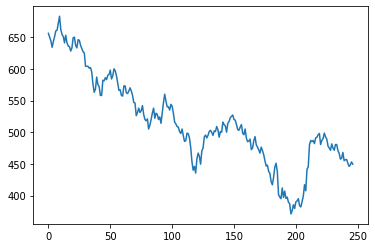

In [11]:
plt.plot(df['Close'])

In [47]:
df['Return'] = df['Adj Close'].pct_change(60).shift(-60)
list_of_features = ['High','Low','Open','Close','Volume','Adj Close']
X = df[list_of_features]
y = np.where(df.Return > 0, 1, 0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2022-01-04,645.0,656.0,644.0,656.0,641.826233,79434666,-0.146709
1,2022-01-05,669.0,669.0,646.0,650.0,635.955933,69593809,-0.114096
2,2022-01-06,638.0,646.0,636.0,644.0,630.085571,53210211,-0.105842
3,2022-01-07,643.0,646.0,632.0,634.0,620.301575,38249908,-0.109174
4,2022-01-10,628.0,645.0,627.0,643.0,629.107178,38289770,-0.123206
...,...,...,...,...,...,...,...,...
242,2022-12-28,451.0,452.0,446.0,451.0,451.000000,32578949,NaN
243,2022-12-29,444.0,449.5,442.5,446.0,446.000000,23020759,NaN
244,2022-12-30,455.0,456.5,448.5,448.5,448.500000,21683478,NaN
245,2023-01-03,446.0,453.5,443.0,453.0,453.000000,14885824,NaN


In [48]:
y[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=423,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(172, 6)
(75, 6)
(172,)
(75,)


In [50]:
treeClassifier = DecisionTreeClassifier(max_depth=3,min_samples_leaf=6)
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [51]:
y_pred = treeClassifier.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.80      0.44      0.57         9

    accuracy                           0.92        75
   macro avg       0.86      0.71      0.76        75
weighted avg       0.91      0.92      0.91        75



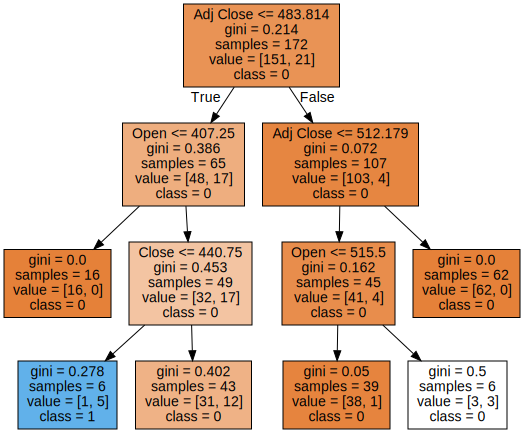

In [53]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(treeClassifier,filled=True,feature_names=list_of_features,class_names=np.array(['0','1']))
graphviz.Source(data)